# **Shave and a Haircut**

In [2]:
files = ['shave.mp3', 'pgh-shave-and-a-haircut.mp3', 'DnShaveAndHaircut.mp3']
file = files[0]

# **Peak Detector**

[  82  154  356  428  591  763  834 1013 1082 1149 1265 1346 1610 1792
 1872 2021 2086 2151 2579 2644 2708 2864 2929 2993 3230 3295 3360 3558
 3785 3850 3914 4151 4216 4306 4445 4593 4921 4997 5062]


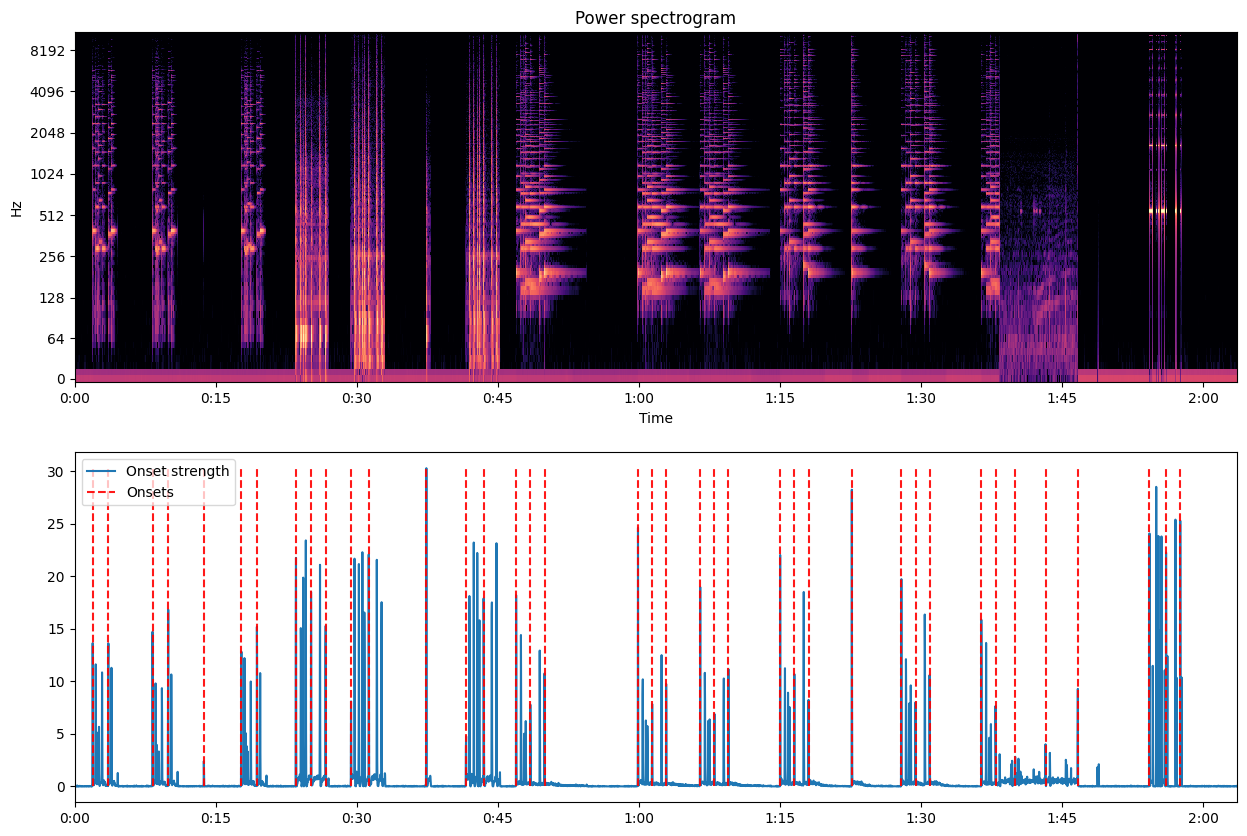

In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

x, sr = librosa.load(file)
onset_frames = librosa.onset.onset_detect(y=x, sr=sr, units='time', backtrack=True,
                                          wait=5, pre_avg=3, post_avg=20, pre_max=1, post_max=1)
onset_times = librosa.frames_to_time(onset_frames)

o_env = librosa.onset.onset_strength(y=x, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.util.peak_pick(o_env, pre_max=10, post_max=10, pre_avg=10, post_avg=10, delta=2, wait=60)

D = np.abs(librosa.stft(x))
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', 
label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
#plt.show()

print(onset_frames) # frame numbers of estimated onsets

In [6]:
import IPython.display as ipd

tt = times[onset_frames]
ii = 21

time_start_seconds = tt[ii] - .5
time_end_seconds = tt[ii+3]- 2

time_start_samples = int(time_start_seconds * sr)
time_end_samples = int(time_end_seconds * sr)

y = x[time_start_samples: time_end_samples]


# fix this to use librosa.time_to_frames() instead... why you no work?
#y = x[librosa.time_to_frames(time_start_seconds): librosa.time_to_frames(time_end_seconds)]

ipd.Audio(data=y, rate=sr) # you cannot interate on samples, ;-(

In [ ]:
print(onset_times)